6. In this exercise, you will further analyze the Wage data set considered
throughout this chapter.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import f_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

%matplotlib inline

wage=pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv")
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


(a) Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d  for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial ft to the data.

In [2]:
np.random.seed(100)

In [3]:
# Model variables
y = wage['wage']  # Assuming 'data' contains both 'age' and 'wage'
X = wage[['age']]  # Use double brackets to keep X as DataFrame

scores = []
for i in range(21):  # range(21) will iterate from 0 to 20
    model = Pipeline([('poly', PolynomialFeatures(degree=i)), ('linear', LinearRegression())])
    model.fit(X, y)

    score = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')  # Negative sign to make it positive
    scores.append(np.mean(score))

scores = np.array(scores)  # Convert scores to numpy array for better handling

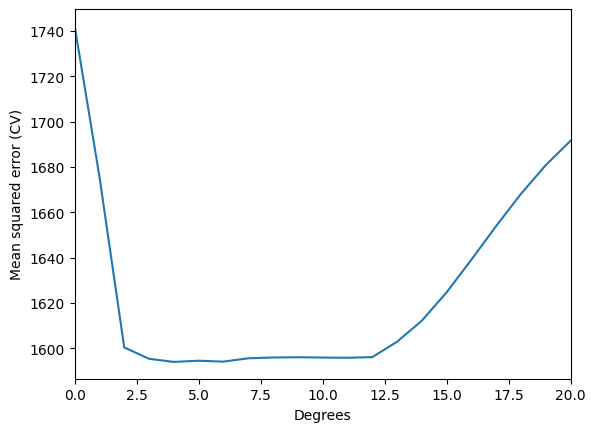

In [4]:
# Plot errors
x_plot = np.arange(0,21)

plt.plot(x_plot, scores)
plt.ylabel('Mean squared error (CV)')
plt.xlabel('Degrees')
plt.xlim(0,20)
plt.show()



select the optimal degree d for the polynomial

In [5]:
print(np.where(scores == np.min(scores)))

(array([4]),)


Use cross-validation to select the optimal degree d for the polynomial which is 4.

hypothesis testing using ANOVA using statsmodels

In [6]:
# Fitting polynomial models:
models=[]
for i in range(0,21):
    poly = PolynomialFeatures(degree=i)
    X_pol = poly.fit_transform(X)
    model = sm.GLS(y, X_pol).fit()
    models.append(model)

Performing Hypothesis Testing using ANOVA:

In [7]:
sm.stats.anova_lm(models[0], models[1], models[2], models[3], models[4], models[5], models[6],models[7],models[8],models[9],models[10], typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2999.0,5.222086e+06,0.0,NaN,NaN,NaN
1,2998.0,5.022216e+06,1.0,199869.664970,125.379279,1.536176e-28
2,2997.0,4.793430e+06,1.0,228786.010128,143.518652,2.449935e-32
3,2996.0,4.777674e+06,1.0,15755.693664,9.883628,1.683872e-03
4,2995.0,4.771604e+06,1.0,6070.152124,3.807838,5.110636e-02
5,2994.0,4.770322e+06,1.0,1282.563017,0.804558,3.698061e-01
6,2993.0,4.766389e+06,1.0,3932.257630,2.466726,1.163856e-01
7,2993.0,4.764599e+06,-0.0,1790.494445,-inf,NaN
8,2993.0,4.764136e+06,-0.0,462.455755,-inf,NaN
9,2993.0,4.764981e+06,-0.0,-844.211529,inf,NaN


As F values drop, the coefficient's importance also does. Furthermore, the polynomial regression model is not significantly improved by degrees greater than 4. These results are consistent with the cross-validation results.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


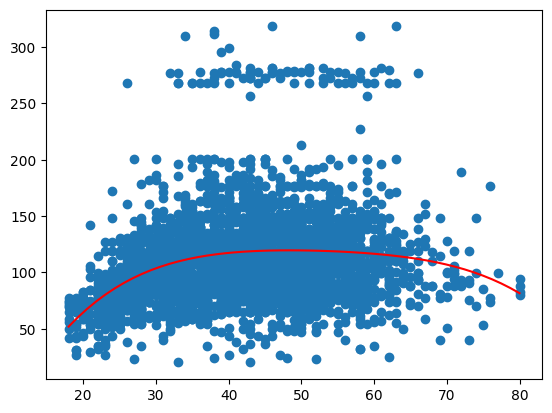

In [8]:
opt_degree = 4 # storing the optimal degree for further use in PolynomialFeatures and plot the polynomial regression:

model = Pipeline([('poly', PolynomialFeatures(degree = opt_degree)), ('linear', LinearRegression())])
model.fit(X,y)

X_lin = np.linspace(18,80)[:,np.newaxis]
y_lin = model.predict(X_lin)

plt.scatter(X,y)
plt.plot(X_lin, y_lin,'-r');

(b) Fit a step function to predict wage using age, and perform crossvalidation
to choose the optimal number of cuts. Make a plot of
the fit obtained.

In [12]:
scores = []
for i in range(1,20):
    age_groups = pd.cut(wage['age'], i)
    df_dummies = pd.get_dummies(age_groups)

    X_cv = df_dummies
    y_cv = wage['wage']

    model.fit(X_cv, y_cv)
    score = cross_val_score(model, X_cv, y_cv, cv=10, scoring='neg_mean_squared_error')
    scores.append(score)

scores = np.abs(scores) # converting negative MSE to postive using abs() function.

In [15]:
# Number of cuts that minimize the error
min_scores = []
for i in range(0,9):
    min_score = np.mean(scores[i,:])
    min_scores.append(min_score)

    print('Number of cuts: %i, error %.3f' % (i+1, min_score))

# Find the minimum score and corresponding number of cuts
min_index = min_scores.index(min(min_scores))
min_score = min(min_scores)
print()
print(f"The number of cuts that minimize the error is : {min_score} at the number cut: {min_index + 1}")


Number of cuts: 1, error 1742.249
Number of cuts: 2, error 1734.212
Number of cuts: 3, error 1683.096
Number of cuts: 4, error 1635.559
Number of cuts: 5, error 1633.769
Number of cuts: 6, error 1627.065
Number of cuts: 7, error 1611.161
Number of cuts: 8, error 1602.094
Number of cuts: 9, error 1617.504

The number of cuts that minimize the error is : 1602.094431940049 at the number cut: 8


In [19]:
# Convert ages to groups of age ranges
n_groups = 8
age_groups = pd.cut(wage['age'], n_groups)
age_dummies = pd.get_dummies(age_groups)
# Add wage to the dummy dataset.
df_step = age_dummies.join(wage['wage'])

In [20]:
df_step.head()

,"(17.938, 25.75]","(25.75, 33.5]","(33.5, 41.25]","(41.25, 49.0]","(49.0, 56.75]","(56.75, 64.5]","(64.5, 72.25]","(72.25, 80.0]",wage
0,True,False,False,False,False,False,False,False,75.043154
1,True,False,False,False,False,False,False,False,70.476020
2,False,False,False,True,False,False,False,False,130.982177
3,False,False,False,True,False,False,False,False,154.685293
4,False,False,False,False,True,False,False,False,75.043154


In [21]:
X_step = df_step.iloc[:,:-1]
y_step = df_step.iloc[:,-1]

In [22]:
reg = sm.GLM(y_step, X_step).fit()

In [23]:
X_aux = np.linspace(18,80)
groups_aux = pd.cut(X_aux, n_groups)
aux_dummies = pd.get_dummies(groups_aux)

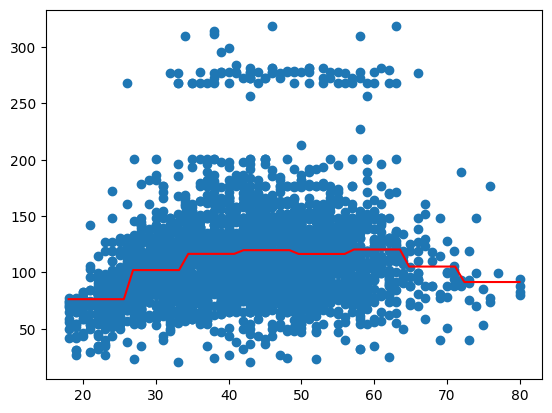

In [24]:
# Plot step function
X_step_lin = np.linspace(18,80)
y_lin = reg.predict(aux_dummies)

plt.scatter(X,y)
plt.plot(X_step_lin, y_lin,'-r');

10. This question relates to the College data set.

In [4]:
df = pd.read_csv('https://www.statlearning.com/s/College.csv', index_col=0)

# Dummy variables
# The feature 'Private' is categorical. In order to use it in our models, we need to use dummy variables.
df = pd.get_dummies(df)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False,True
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False,True
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False,True
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,False,True
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False,True


(a) Split the data into a training set and a test set. Using out-of-state
tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.

In [5]:
# Dataset
X = df.drop(['Outstate'], axis=1)
y = df['Outstate']

# Split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


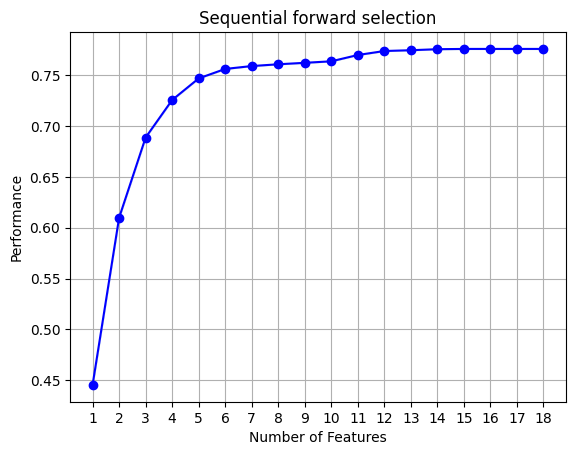

In [6]:
# Forward stepwise selection
lr = LinearRegression()

sfs = SFS(lr,
          k_features = 18,  # We have 18 features
          forward = True,
          floating = False,
          scoring = 'r2',
          cv = 0)

sfs = sfs.fit(X_train, y_train)  # as_matrix() to be readable by sfs

fig = plot_sfs(sfs.get_metric_dict())

#plt.title('Sequential forward selection (w. StdDev)')
plt.title('Sequential forward selection')
plt.grid()
plt.show()

We will choose six features. According to the graphic, adding more features after this point won't significantly improve performance.

In [7]:
# Visualizing the results in dataframes
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(14,)",[0.44548490593604373],0.445485,"(Expend,)",NaN,0.0,NaN
2,"(14, 16)",[0.6098746812158646],0.609875,"(Expend, Private_No)",NaN,0.0,NaN
3,"(7, 14, 16)",[0.6887746037816894],0.688775,"(Room.Board, Expend, Private_No)",NaN,0.0,NaN
4,"(7, 13, 14, 16)",[0.7256619159122937],0.725662,"(Room.Board, perc.alumni, Expend, Private_No)",NaN,0.0,NaN
5,"(7, 10, 13, 14, 16)",[0.7468820442179642],0.746882,"(Room.Board, PhD, perc.alumni, Expend, Private...",NaN,0.0,NaN
6,"(7, 10, 13, 14, 15, 16)",[0.7562065682189014],0.756207,"(Room.Board, PhD, perc.alumni, Expend, Grad.Ra...",NaN,0.0,NaN
7,"(7, 9, 10, 13, 14, 15, 16)",[0.7590373434320926],0.759037,"(Room.Board, Personal, PhD, perc.alumni, Expen...",NaN,0.0,NaN
8,"(3, 7, 9, 10, 13, 14, 15, 16)",[0.7607756220059703],0.760776,"(Top10perc, Room.Board, Personal, PhD, perc.al...",NaN,0.0,NaN
9,"(3, 7, 9, 10, 12, 13, 14, 15, 16)",[0.7622330250671435],0.762233,"(Top10perc, Room.Board, Personal, PhD, S.F.Rat...",NaN,0.0,NaN
10,"(1, 3, 7, 9, 10, 12, 13, 14, 15, 16)",[0.7637006442613157],0.763701,"(Accept, Top10perc, Room.Board, Personal, PhD,...",NaN,0.0,NaN


In [8]:
# Variables that we will choose
print('Variables: %s, %s, %s, %s, %s, %s' % (X.columns[16], X.columns[7], X.columns[10], X.columns[13], X.columns[14], X.columns[15]))

Variables: Private_No, Room.Board, PhD, perc.alumni, Expend, Grad.Rate


In [9]:
selected_features = ["Private_No", "Room.Board", "PhD", "perc.alumni", "Expend", "Grad.Rate"]
selected_features

['Private_No', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate']

(b) Fit a GAM on the training data, using out-of-state tuition as
the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.

In [10]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [12]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 3.2 MB/s eta 0:00:00


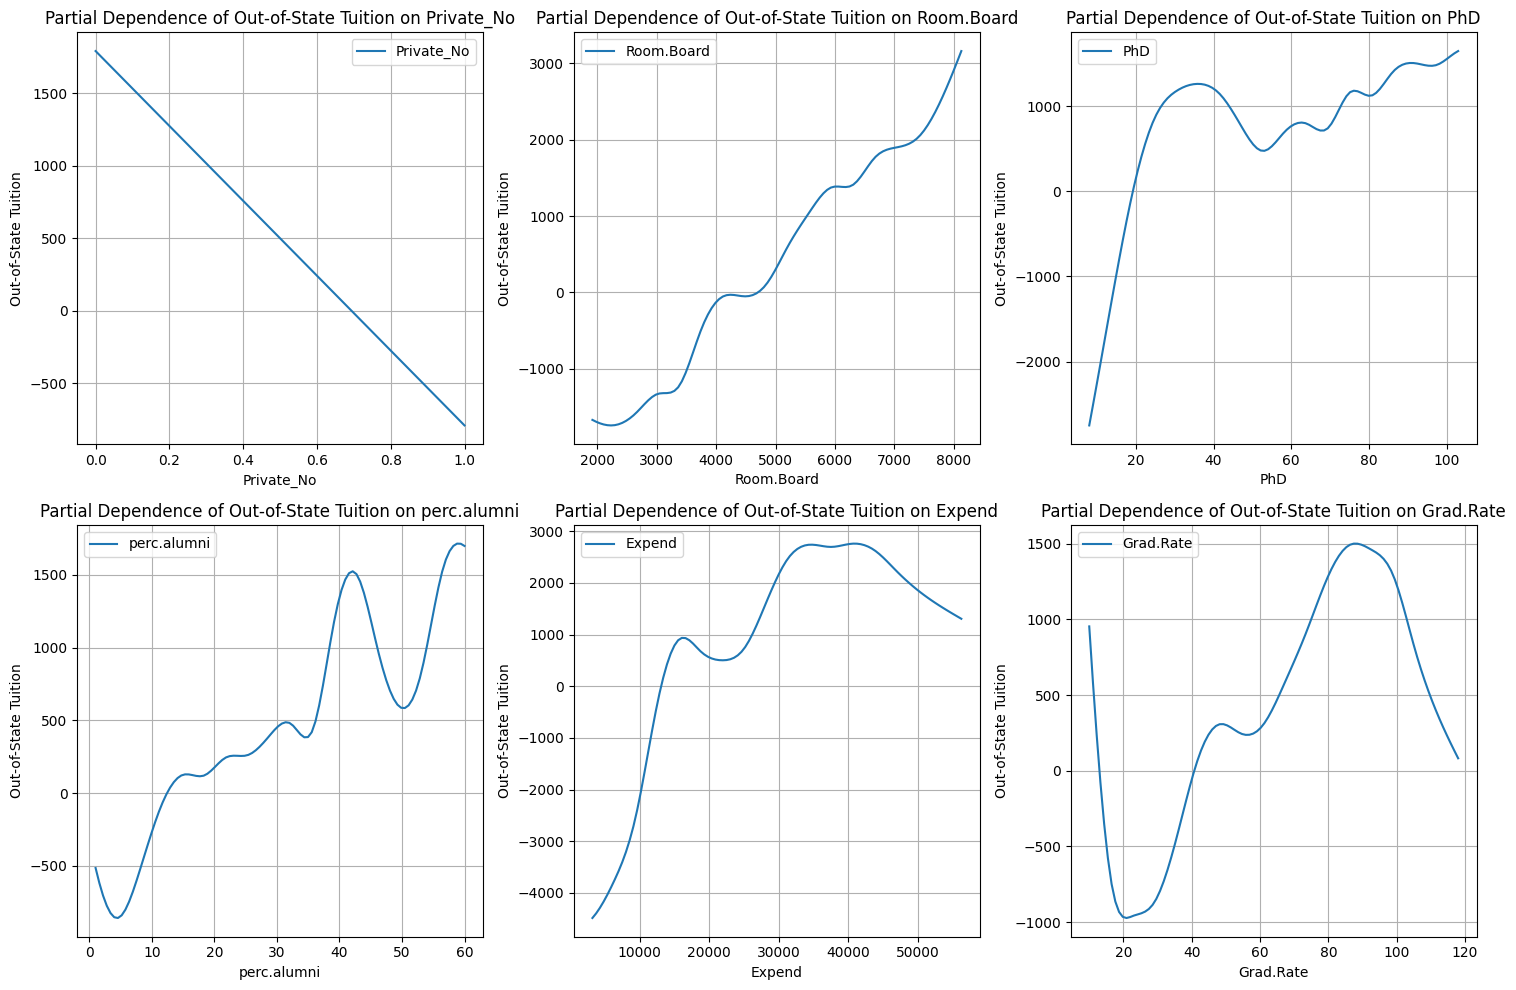

In [13]:
from pygam import LinearGAM, s, f, l

# Fit GAM model
gam = LinearGAM().fit(X_train_selected, y_train)

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    XX = gam.generate_X_grid(term=i)
    partial_dep = gam.partial_dependence(term=i, X=XX)
    plt.plot(XX[:, i], partial_dep, label=feature)
    plt.title("Partial Dependence of Out-of-State Tuition on {}".format(feature))
    plt.xlabel(feature)
    plt.ylabel("Out-of-State Tuition")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     54.5714
Link Function:                     IdentityLink Log Likelihood:                                  -9907.585
Number of Samples:                          621 AIC:                                            19926.3128
                                                AICc:                                           19937.4524
                                                GCV:                                           4016346.628
                                                Scale:                                        3386490.0647
                                                Pseudo R-Squared:                                   0.8075
Feature Function                  Lam

<ipython-input-14-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Interpretation: Private institutions usually charge greater out-of-state tuition, which is influenced by a number of variables like graduation rates, alumni percentages, Ph.D. program availability, and availability of boarding rooms. On the other hand, tuition costs frequently drop due to individual reasons. There is a sharp rise in spending at first, which is followed by a slowdown and then a small decline.

(c) Evaluate the model obtained on the test set, and explain the
results obtained.

In [15]:
# Evaluating the model on the test dataset
test_score = gam.score(X_test_selected, y_test)
print("Test Set R^2 Score:", test_score)

Test Set R^2 Score: 0.7687301916198483


Six factors were shown to be highly important in our research using out-of-state tuition as the response variable, which helps to explain the variation in tuition costs. These predictors include the following: the percentage of alumni who donate to the university ('perc.alumni'), the cost of boarding rooms ('Room.Board'), the graduation rate ('Grad.Rate'), the number of Ph.D. holders among faculty members ('PhD'), and whether or not the university is private ('Private_No').


With these six predictors, our Generalized Additive Model (GAM) model produced a Test Set R^2 Score of roughly 0.769. This suggests that our model can account for roughly 76.87% of the variation in out-of-state tuition costs. This high R^2 value indicates that the chosen variables together offer insightful information about the factors influencing out-of-state tuition costs.

(d) For which variables, if any, is there evidence of a non-linear
relationship with the response?

The partial dependence charts from Part (b) are available for inspection. There may be a non-linear relationship between the predictor and the responder if the curves are non-linear.
Also, we have the evidence from the summary of GAM model, which suggest that:

Interpretation:  The graphs illustrating the partial dependence of 'out-of-state tuition' on 'perc.alumni' and 'graduation rate' are non-linear. This indicates that the relationship between the variables is not constant and that the graphs do not follow a straight line. Also, we have evidence from the summary of GAM model which suggest that demonstrates a strong nonlinear link between 'spending' and 'out-of-state' tuition.
